In [1]:
import pathlib
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
from netCDF4 import Dataset
import cartopy
from visualisation_utils import plot_colormap_from_dataset, \
    plot_wind_components_from_dataset, plot_wind_components_from_different_datasets, process_station_txt_file_from_MeteoSwiss, distance_from_coordinates, HigherResPlateCarree

data_path = pathlib.Path("../data")
warnings.filterwarnings('ignore')

# ERA5 Data

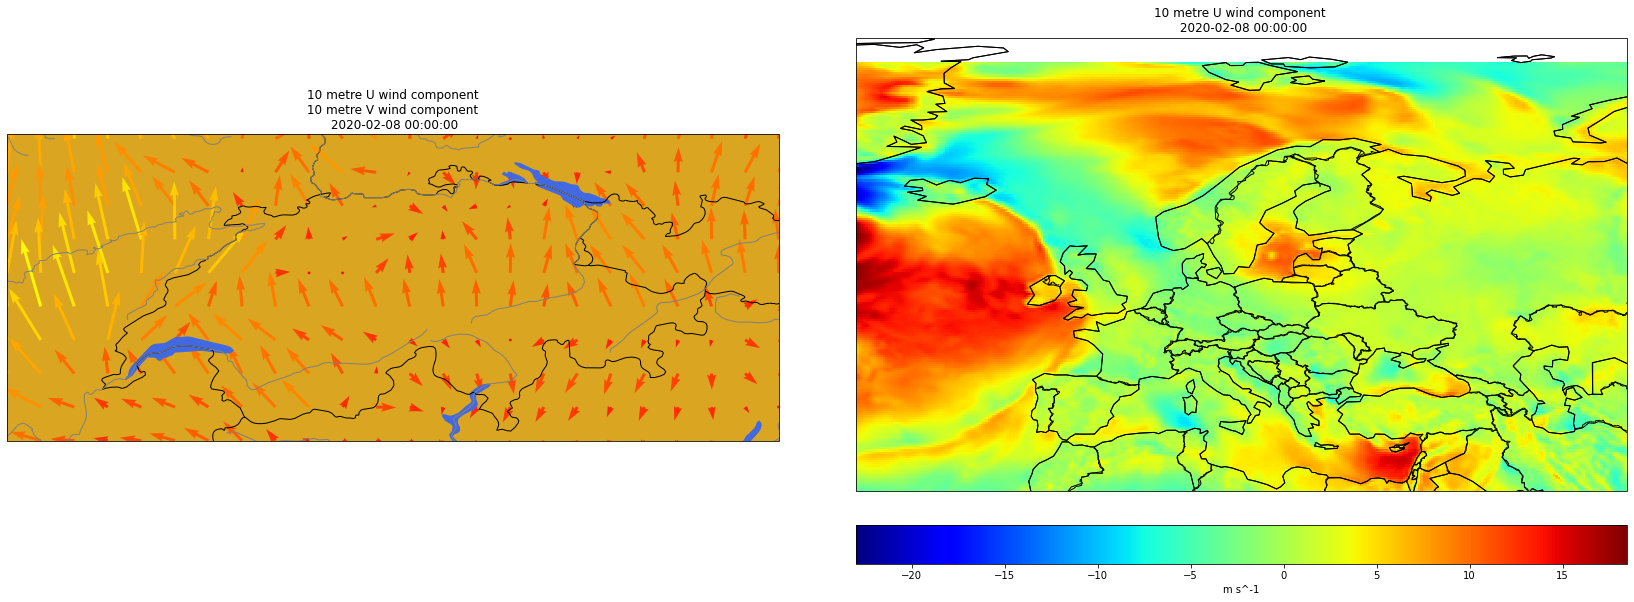

In [2]:
file = data_path.glob('ERA5/*.nc').__next__()
data = Dataset(file, mode='r')  # read the data
range_long = (5.1, 11.2)
range_lat = (45.7, 48.1)

subplot_kw = {'projection': HigherResPlateCarree()}
fig, (ax1, ax2) = plt.subplots(ncols=2, subplot_kw=subplot_kw, figsize=(25,12.5))
fig.subplots_adjust(wspace=0.1, left=0.05, right=0.95)
plot_wind_components_from_dataset(data, 0, 'u10', 'v10',
                                  range_lon=range_long, range_lat=range_lat,
                                  ax=ax1)
plot_colormap_from_dataset(data, 0, 'u10', ax=ax2)
fig.show()

# NASA-GISS-E2-R CMIP5 RCP4.5 Data

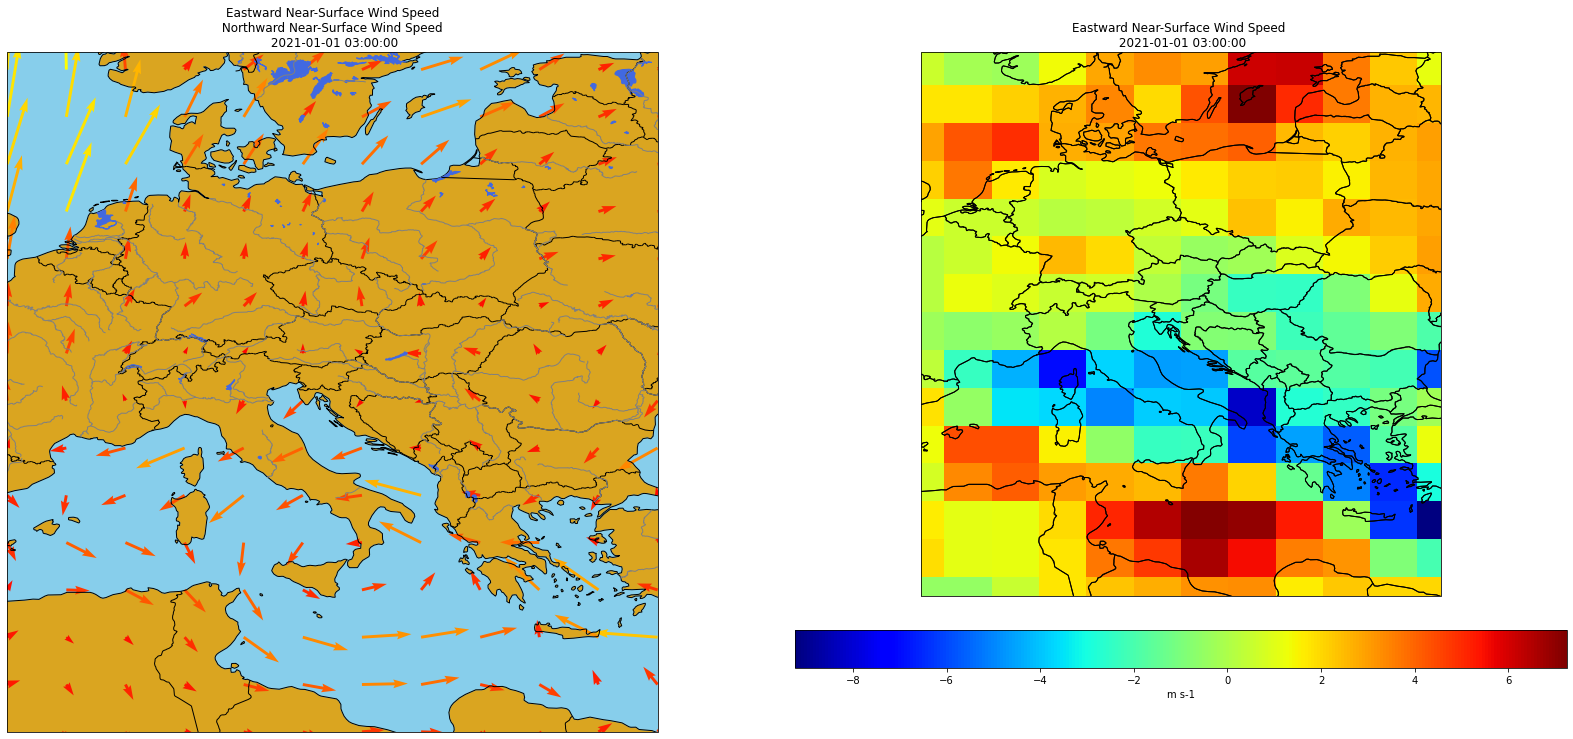

In [3]:
file_uas = data_path.glob("NASA-GISS-E2-R/rcp45/uas*.nc").__next__()
d1 = Dataset(file_uas, mode='r')  # read the data
file_vas = data_path.glob("NASA-GISS-E2-R/rcp45/vas*.nc").__next__()
d2 = Dataset(file_vas, mode='r')

range_long = (0 , 30)
range_lat = (30, 60)

subplot_kw = {'projection': HigherResPlateCarree()}
fig, (ax1, ax2) = plt.subplots(ncols=2, subplot_kw=subplot_kw, figsize=(25, 12.5))
fig.subplots_adjust(wspace=0.1, left=0.05, right=0.95)
plot_wind_components_from_different_datasets(d1, d2, 0, 'uas', 'vas',
                                             range_lon=range_long,
                                             range_lat=range_lat,
                                             ax=ax1)
plot_colormap_from_dataset(d1, 0, 'uas', range_lon=range_long,
                                             range_lat=range_lat, ax=ax2)
fig.show()


# MeteoSwiss Observations

In [4]:
file_obs = pathlib.Path(data_path, 'MS_observations/wind_2016_2021_processed.csv')
file_station = pathlib.Path(data_path, 'MS_observations/stations.txt')
obs = pd.read_csv(file_obs)
obs.head(10)

,Unnamed: 0,Unnamed: 0.1,station,datetime_raw,wind_speed_mps,wind_direction_degrees,theta_radians,u10,v10,date,...,station_name,data_source,altitude_m,lon,lat,x_km,y_km,enriched_name,altitude_bins,hour
0,0,0,ALT,2016010100,1.2,175.0,3.054326,1.045869e-01,-1.195434,2016-01-01,...,Altdorf,MeteoSchweiz,437,8.616667,46.883333,690180.0,193564.0,Altdorf (ALT),"(272.999, 437.0]",0
1,1,1,ALT,2016010101,0.6,162.0,2.827433,1.854102e-01,-0.570634,2016-01-01,...,Altdorf,MeteoSchweiz,437,8.616667,46.883333,690180.0,193564.0,Altdorf (ALT),"(272.999, 437.0]",1
2,2,2,ALT,2016010102,0.4,180.0,3.141593,4.898587e-17,-0.400000,2016-01-01,...,Altdorf,MeteoSchweiz,437,8.616667,46.883333,690180.0,193564.0,Altdorf (ALT),"(272.999, 437.0]",2
3,3,3,ALT,2016010103,0.8,150.0,2.617994,4.000000e-01,-0.692820,2016-01-01,...,Altdorf,MeteoSchweiz,437,8.616667,46.883333,690180.0,193564.0,Altdorf (ALT),"(272.999, 437.0]",3
4,4,4,ALT,2016010104,0.8,157.0,2.740167,3.125849e-01,-0.736404,2016-01-01,...,Altdorf,MeteoSchweiz,437,8.616667,46.883333,690180.0,193564.0,Altdorf (ALT),"(272.999, 437.0]",4
5,5,5,ALT,2016010105,1.3,171.0,2.984513,2.033648e-01,-1.283995,2016-01-01,...,Altdorf,MeteoSchweiz,437,8.616667,46.883333,690180.0,193564.0,Altdorf (ALT),"(272.999, 437.0]",5
6,6,6,ALT,2016010106,1.4,117.0,2.042035,1.247409e+00,-0.635587,2016-01-01,...,Altdorf,MeteoSchweiz,437,8.616667,46.883333,690180.0,193564.0,Altdorf (ALT),"(272.999, 437.0]",6
7,7,7,ALT,2016010107,0.9,180.0,3.141593,1.102182e-16,-0.900000,2016-01-01,...,Altdorf,MeteoSchweiz,437,8.616667,46.883333,690180.0,193564.0,Altdorf (ALT),"(272.999, 437.0]",7
8,8,8,ALT,2016010108,0.7,149.0,2.600541,3.605267e-01,-0.600017,2016-01-01,...,Altdorf,MeteoSchweiz,437,8.616667,46.883333,690180.0,193564.0,Altdorf (ALT),"(272.999, 437.0]",8
9,9,9,ALT,2016010109,0.6,146.0,2.548181,3.355157e-01,-0.497423,2016-01-01,...,Altdorf,MeteoSchweiz,437,8.616667,46.883333,690180.0,193564.0,Altdorf (ALT),"(272.999, 437.0]",9


<AxesSubplot:xlabel='station'>

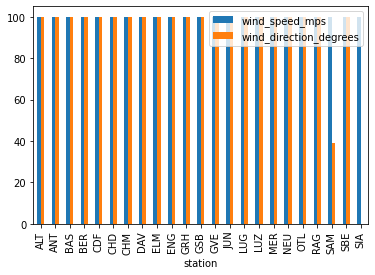

In [5]:
def pct_data_available(x: pd.Series):
    return 100*x.count()/len(x)
obs.groupby('station').agg({'wind_speed_mps': pct_data_available, 'wind_direction_degrees':pct_data_available}).plot(kind='bar')

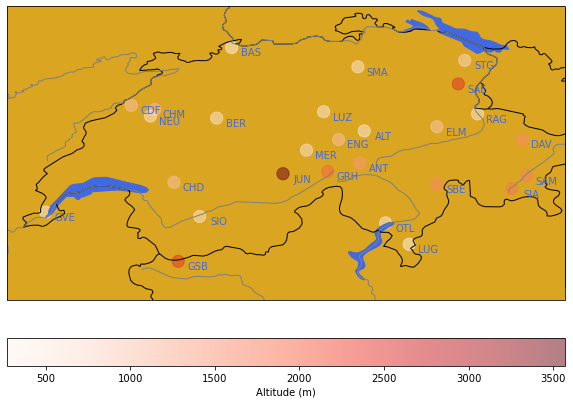

In [6]:
stations=process_station_txt_file_from_MeteoSwiss(file_station)\
.assign(enriched_name = lambda x: x['station_name'] + ' ('+ x['station'] + ')')
def plot_stations(ax, stations_df):
    proj = HigherResPlateCarree()
    ax = plt.axes(projection=proj)
    ax.set_extent([stations.lon.min()-0.3, stations.lon.max()+0.3, stations.lat.min()-0.3, stations.lat.max()+0.3])
    ax.coastlines()
    ax.add_feature(cartopy.feature.LAND, color='goldenrod')
    ax.add_feature(cartopy.feature.LAKES.with_scale('10m'), color='royalblue')
    ax.add_feature(cartopy.feature.OCEAN, color='skyblue')
    ax.add_feature(cartopy.feature.BORDERS.with_scale('10m'), color='black')
    ax.add_feature(cartopy.feature.RIVERS.with_scale('10m'), color='grey')
    c_scheme = ax.scatter(x=stations.lon, y=stations.lat,
                s=150,
                c=stations.altitude_m,
                cmap='Reds',
                alpha=0.5,
                transform=HigherResPlateCarree())
    plt.colorbar(c_scheme, location='bottom', pad=0.07,
                 label='Altitude (m)', ax=ax)
    for s, d in stations.groupby('station'):
        ax.text(d.lon+0.15, d.lat-0.04, s, transform=HigherResPlateCarree(),
                fontsize=10, c='royalblue', horizontalalignment='center', verticalalignment='center')
subplot_kw = {'projection': HigherResPlateCarree()}
fig, ax1 = plt.subplots(ncols=1, subplot_kw=subplot_kw, figsize=(10, 10))
plot_stations(ax1, stations)
fig.show()

## Wind Speed

Text(0, 0.5, 'wind speed (ms^-1)')

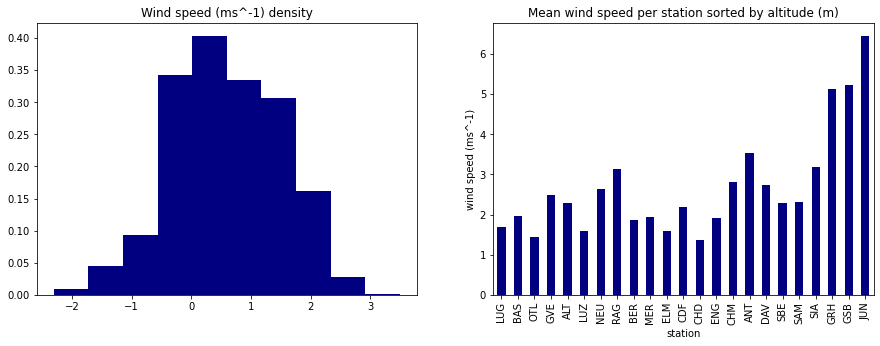

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(15,5))
ax1.hist(np.log(obs[obs['wind_speed_mps']>0]['wind_speed_mps']), density=True, color='navy')
obs.groupby('station').agg({'wind_speed_mps':'mean', 'altitude_m': lambda x: x.unique()})\
.sort_values(by='altitude_m')['wind_speed_mps'].plot(kind='bar', ax=ax2, color='navy')
ax1.set_title('Wind speed (ms^-1) density')
ax2.set_title('Mean wind speed per station sorted by altitude (m)')
ax2.set_ylabel('wind speed (ms^-1)')

Text(0.5, 1.0, 'Square root wind speed (ms^-1) density')

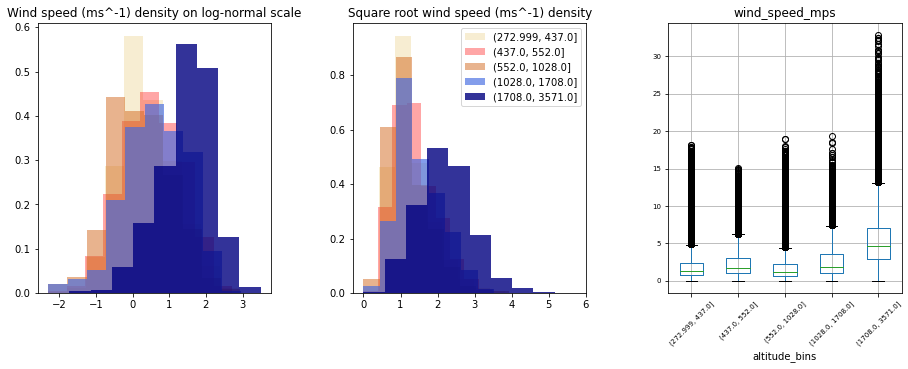

In [8]:
nb_bins =5
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(15,5))
obs['altitude_bins'] = pd.qcut(obs['altitude_m'],nb_bins)
for (ab, df), c, a in zip(obs.groupby('altitude_bins'), 
                          ['goldenrod', 'red', 'chocolate','royalblue', 'navy'],
                          np.linspace(0.2,0.8,nb_bins)):
    ax1.hist(np.log(df[df['wind_speed_mps']>0]['wind_speed_mps']), density=True, 
             label=ab, color=c, alpha=a)
    ax2.hist(np.sqrt(df['wind_speed_mps']), density=True,
             label=ab, color=c, alpha=a)
obs.boxplot(by='altitude_bins', column=['wind_speed_mps'], ax=ax3, rot=45, fontsize=7)
fig.suptitle('')
ax1.set_title('Wind speed (ms^-1) density on log-normal scale')
ax2.legend()
plt.subplots_adjust(wspace=0.35)
ax2.set_title('Square root wind speed (ms^-1) density')

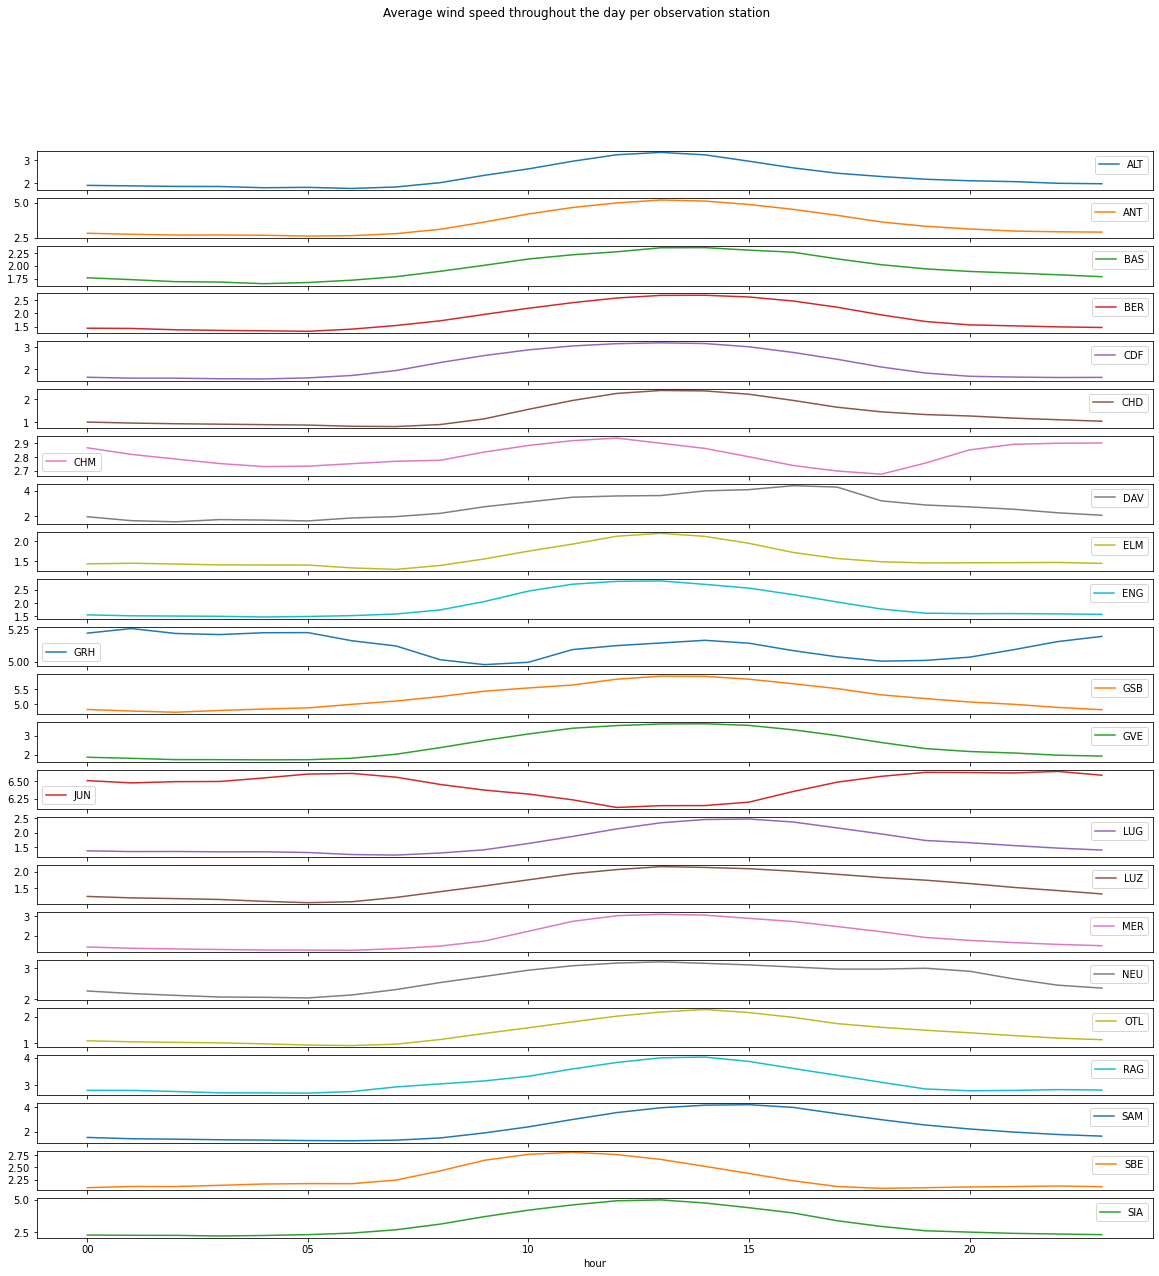

In [9]:
obs = obs.assign(hour = lambda x: x['datetime'].str[-8:])
obs['hour'] = obs['hour'].str[0:2]
obs.groupby(['hour', 'station']).agg({'wind_speed_mps':'mean'})['wind_speed_mps'].unstack('station').plot(subplots=True,
                                                                                                         title='Average wind speed throughout the day per observation station',
                                                                                                          sharex=True,
                                                                                                          figsize=(20,20))
plt.legend()

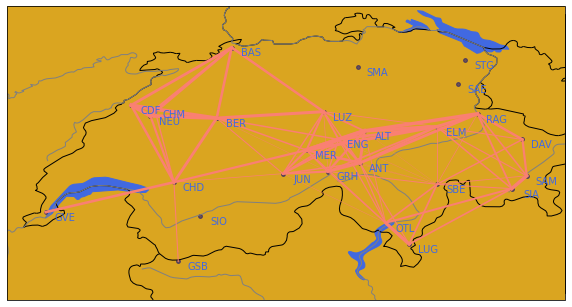

In [10]:
corr_wind_speed = obs.set_index(['station', 'datetime'])['wind_speed_mps'].unstack('station').corr()
def plot_correlation_between_stations(ax, stations_df, corr_df):
    proj = HigherResPlateCarree()
    ax = plt.axes(projection=proj)
    ax.set_extent([stations.lon.min()-0.3, stations.lon.max()+0.3, stations.lat.min()-0.3, stations.lat.max()+0.3])
    ax.coastlines()
    ax.add_feature(cartopy.feature.LAND, color='goldenrod')
    ax.add_feature(cartopy.feature.LAKES.with_scale('10m'), color='royalblue')
    ax.add_feature(cartopy.feature.OCEAN, color='skyblue')
    ax.add_feature(cartopy.feature.BORDERS.with_scale('10m'), color='black')
    ax.add_feature(cartopy.feature.RIVERS.with_scale('10m'), color='grey')
    c_scheme = ax.scatter(x=stations.lon, y=stations.lat,
                s=15,
                c='navy',
                alpha=0.5,
                transform=HigherResPlateCarree())
    for s1, s2 in combinations(corr_df.columns,2):
        lon1, lat1 = float(stations[stations['station']==s1].lon), float(stations[stations['station']==s1].lat)
        lon2, lat2 = float(stations[stations['station']==s2].lon), float(stations[stations['station']==s2].lat)
        
        if distance_from_coordinates((lon1, lat1), (lon2, lat2))<=85:
            plt.plot([lon1, lon2], [lat1, lat2],
                 linewidth=0.25+5*np.abs(corr_df.loc[s1, s2]),
                 c='salmon',
                 transform=HigherResPlateCarree())
    for s, d in stations.groupby('station'):
        ax.text(d.lon+0.15, d.lat-0.04, s, transform=HigherResPlateCarree(),
                fontsize=10, c='royalblue', horizontalalignment='center', verticalalignment='center')
subplot_kw = {'projection': HigherResPlateCarree()}
fig, ax1 = plt.subplots(ncols=1, subplot_kw=subplot_kw, figsize=(10, 10))
plot_correlation_between_stations(ax1, stations, corr_wind_speed)
fig.show()

Wind direction seems impacted by altitude (increasing) and hour in the day (gaussian with peak at noon, more or less fat tailed depending on station/altitude?). Log wind speed could be considered Gaussian. 

## Wind direction

Text(0.5, 1.0, 'Wind direction (rad) distribution per station')

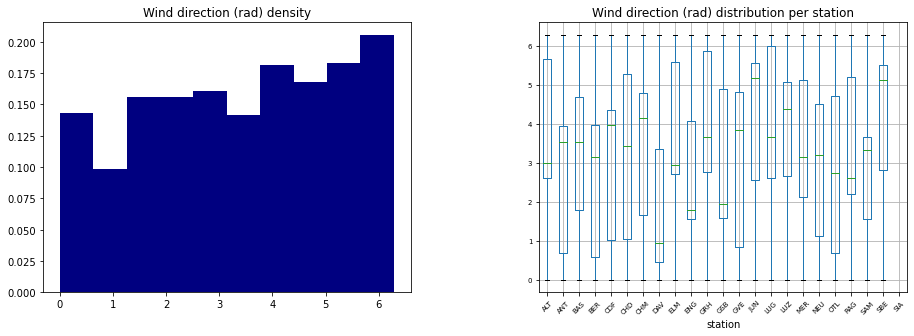

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(15,5))
ax1.hist(obs['theta_radians'], density=True, color='navy')
obs.boxplot(by='station', column=['theta_radians'], ax=ax2, rot=45, fontsize=7)
fig.suptitle('')
ax1.set_title('Wind direction (rad) density')
plt.subplots_adjust(wspace=0.35)
ax2.set_title('Wind direction (rad) distribution per station')

Wind direction almost uniform wiht overdispersion for big values, obviously bounded, no effect from the altitude at first sight, although some variation depending on station. Perhaps it comes from the proximity of some stations?

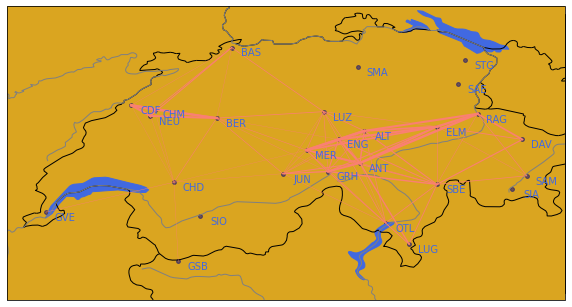

In [12]:
corr_wind_dir = obs.set_index(['station', 'datetime'])['theta_radians'].unstack('station').corr()
def plot_correlation_between_stations(ax, stations_df, corr_df):
    proj = HigherResPlateCarree()
    ax = plt.axes(projection=proj)
    ax.set_extent([stations.lon.min()-0.3, stations.lon.max()+0.3, stations.lat.min()-0.3, stations.lat.max()+0.3])
    ax.coastlines()
    ax.add_feature(cartopy.feature.LAND, color='goldenrod')
    ax.add_feature(cartopy.feature.LAKES.with_scale('10m'), color='royalblue')
    ax.add_feature(cartopy.feature.OCEAN, color='skyblue')
    ax.add_feature(cartopy.feature.BORDERS.with_scale('10m'), color='black')
    ax.add_feature(cartopy.feature.RIVERS.with_scale('10m'), color='grey')
    c_scheme = ax.scatter(x=stations.lon, y=stations.lat,
                s=15,
                c='navy',
                alpha=0.5,
                transform=HigherResPlateCarree())
    for s1, s2 in combinations(corr_df.columns,2):
        lon1, lat1 = float(stations[stations['station']==s1].lon), float(stations[stations['station']==s1].lat)
        lon2, lat2 = float(stations[stations['station']==s2].lon), float(stations[stations['station']==s2].lat)
        
        if distance_from_coordinates((lon1, lat1), (lon2, lat2))<=85:
            plt.plot([lon1, lon2], [lat1, lat2],
                 linewidth=0.25+5*np.abs(corr_df.loc[s1, s2]),
                 c='salmon',
                 transform=HigherResPlateCarree())
    for s, d in stations.groupby('station'):
        ax.text(d.lon+0.15, d.lat-0.04, s, transform=HigherResPlateCarree(),
                fontsize=10, c='royalblue', horizontalalignment='center', verticalalignment='center')
subplot_kw = {'projection': HigherResPlateCarree()}
fig, ax1 = plt.subplots(ncols=1, subplot_kw=subplot_kw, figsize=(10, 10))
plot_correlation_between_stations(ax1, stations, corr_wind_dir)
fig.show()